In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


        incident_id  data_year        ori        pug_agency_name  \
0                43       1991  AR0350100             Pine Bluff   
1                44       1991  AR0350100             Pine Bluff   
2                45       1991  AR0600300      North Little Rock   
3                46       1991  AR0600300      North Little Rock   
4                47       1991  AR0670000                 Sevier   
...             ...        ...        ...                    ...   
241658      1473449       2022  WY0190200           Rock Springs   
241659      1473450       2022  WY0010200  University of Wyoming   
241660      1476554       2022  WY0190000             Sweetwater   
241661      1476555       2022  WY0110100               Cheyenne   
241662      1479088       2022  WY0190100            Green River   

       pub_agency_unit       agency_type_name state_abbr state_name  \
0                  NaN                   City         AR   Arkansas   
1                  NaN                   

## Data Collection 


Analyzing All Hate Crimes 
-trends over the years (for all diff types)
-geographically where these are taking place 
-offense - how are these crimes being ocmmitted / reported 
-university vs normal 

In [ ]:
#Load from csv file
file_path = 'hate_crime.csv'

#read into a DataFrame
all_data = pd.read_csv(file_path)

#Display the DataFrame
print(all_data)

#### Data Cleaning 

In [73]:
# Print column titles
column_names = all_data.columns.tolist()
print(column_names)

# Check for missing values
missing_values = all_data.isnull().sum()
print("Missing Values:")
print(missing_values)

#SHOULD DO SMN HERE TO ADDRESS THE MISSING DATA. IN THIS CASE MAYBE JUST DROP THE CATEGORIES WITH MISSING DATA B/C IRRELEVANT. 



['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'state_name', 'division_name', 'region_name', 'population_group_code', 'population_group_description', 'incident_date', 'adult_victim_count', 'juvenile_victim_count', 'total_offender_count', 'adult_offender_count', 'juvenile_offender_count', 'offender_race', 'offender_ethnicity', 'victim_count', 'offense_name', 'total_individual_victims', 'location_name', 'bias_desc', 'victim_types', 'multiple_offense', 'multiple_bias']
Missing Values:
incident_id                          0
data_year                            0
ori                                  0
pug_agency_name                      0
pub_agency_unit                 234474
agency_type_name                     0
state_abbr                           0
state_name                           0
division_name                        0
region_name                          0
population_group_code              555
population_group_descri

## Data Processing

In [82]:
#FIGURE OUT WHAT IS ACTUALLY THE RELEVANT DATA TO OUR CASE - what do we want to explore? 

only_relevant = all_data[['data_year','state_name', 'agency_type_name', 'bias_desc', 'offense_name', 'incident_date']]
print(only_relevant)

        data_year state_name       agency_type_name  \
0            1991   Arkansas                   City   
1            1991   Arkansas                   City   
2            1991   Arkansas                   City   
3            1991   Arkansas                   City   
4            1991   Arkansas                 County   
...           ...        ...                    ...   
241658       2022    Wyoming                   City   
241659       2022    Wyoming  University or College   
241660       2022    Wyoming                 County   
241661       2022    Wyoming                   City   
241662       2022    Wyoming                   City   

                                                bias_desc  \
0                          Anti-Black or African American   
1                                              Anti-White   
2                                              Anti-White   
3                                              Anti-White   
4                          Anti-Bl

## Exploratory Data Analysis:




### Data Exploration and Visualization:

general hate crimes  
-hate crimes by category 

-hate crimes over the years 

-hate crimes university vs regular 
 
-hate crimes per state 


Conduct further exploratory data analysis to gain insights into the characteristics of hate crimes. This can involve creating additional visualizations, such as bar plots, pie charts, or heatmaps, to analyze different aspects of the data such as demographics of victims and perpetrators, types of crimes, locations, and time trends.


-overall hate crime increase over the years 
-can make a separate dataframe with just overall numbers per year in any category and find other data to account for it 

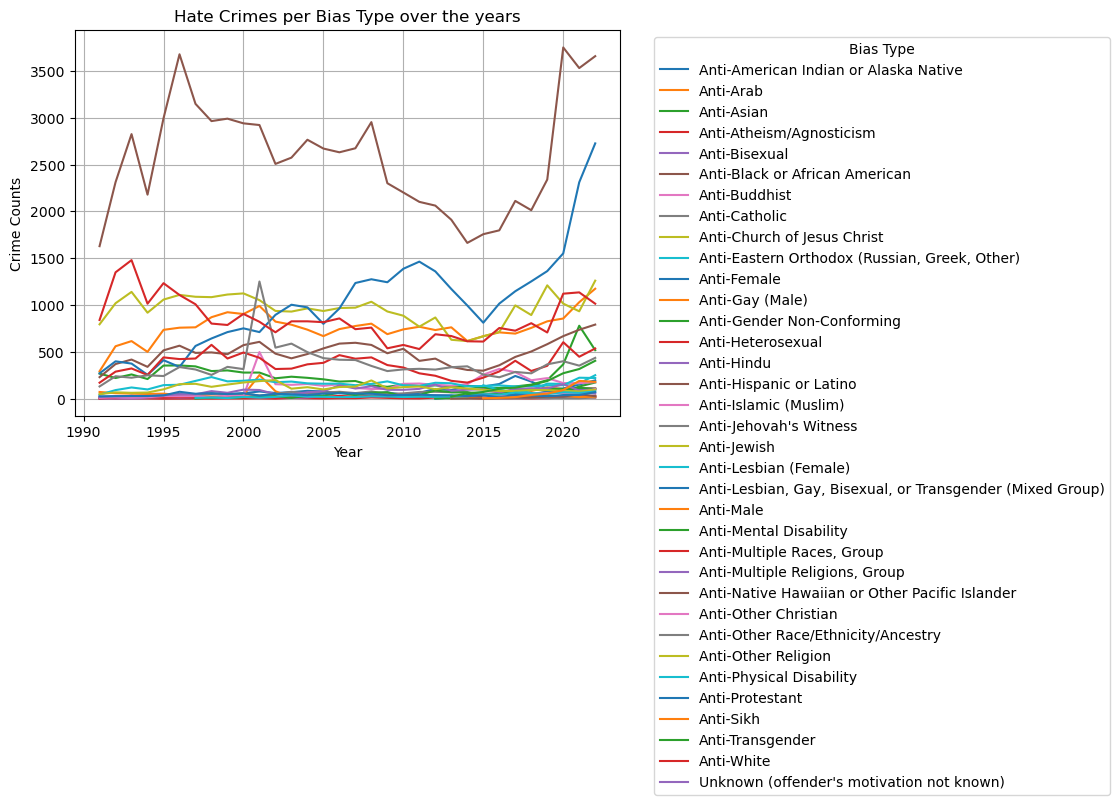

In [80]:
og_expand = only_relevant.assign(bias_desc=only_relevant['bias_desc'].str.split(', ')).explode('bias_desc')
expanded_data = og_expand.assign(bias_desc=only_relevant['bias_desc'].str.split(';')).explode('bias_desc')

crime_counts = expanded_data.groupby(['data_year', 'bias_desc']).size().reset_index(name='count_of_crimes')

pivot_table = crime_counts.pivot(index='data_year', columns='bias_desc', values='count_of_crimes')

for category in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[category], label=category)

plt.title('Hate Crimes per Bias Type over the years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()

plt.legend(title='Bias Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Antisemetism 
Specifically focusing on antisemitism as it pertains to us. 
Our topic of interest.
Provide visualization for it and then summarize and report after. 

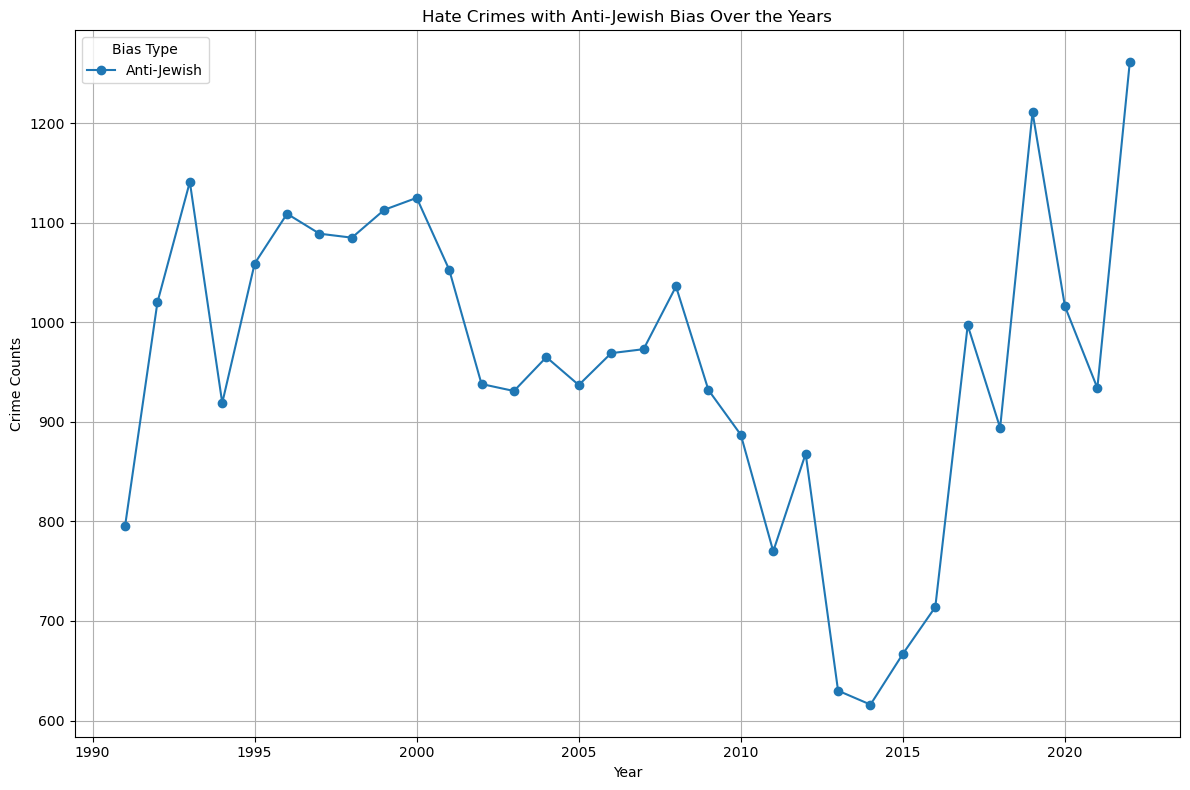

In [77]:
# Filter the expanded_data DataFrame to include only the rows with the "Anti-Jewish" bias category
anti_jewish_data = expanded_data[expanded_data['bias_desc'] == 'Anti-Jewish']

# Group the filtered data by 'data_year' and count the number of hate crimes for each year
crime_counts_anti_jewish = anti_jewish_data.groupby('data_year').size().reset_index(name='count_of_crimes')

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(crime_counts_anti_jewish['data_year'], crime_counts_anti_jewish['count_of_crimes'], marker='o', label='Anti-Jewish')

plt.title('Hate Crimes with Anti-Jewish Bias Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Bias Type')
plt.show()

#maybe after this we can make a linear regression model to predict the number of antisemetic acts that would occur in 2023-2024


#Maybe here we can import data specifically for antisemetic acts in 2023 & 2024 

#its also worth noting historical context? 


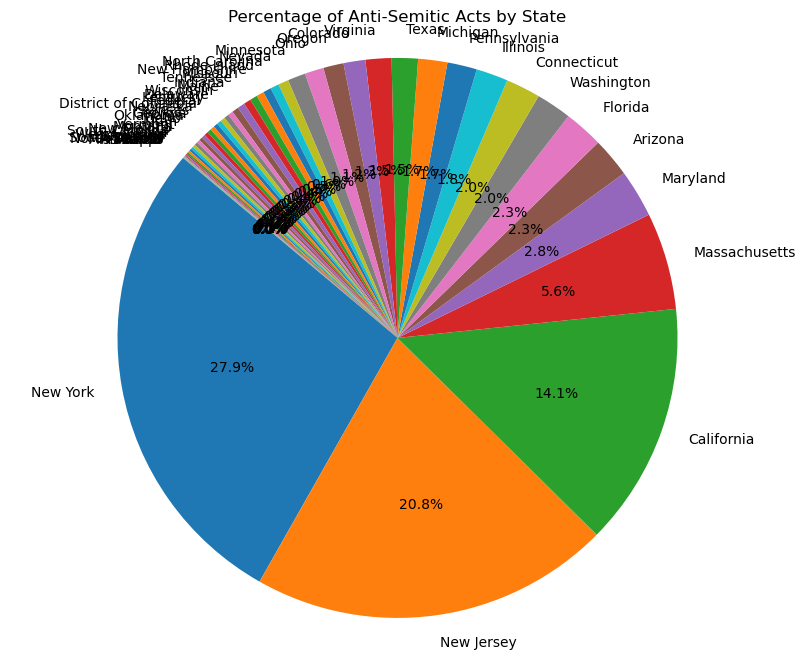

In [78]:
#per state
anti_semitic_data = only_relevant[all_data['bias_desc'] == 'Anti-Jewish']

# Group the filtered data by state and count the number of incidents in each state
antisemitic_per_state = anti_semitic_data['state_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
antisemitic_per_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Anti-Semitic Acts by State')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Analysis, hypothesis testing, & ML

Add in the ADL antisemtism data to help make a clearer version of a model.


Formulate hypotheses about hate crimes based on your EDA findings. For example, you may hypothesize that hate crimes are more prevalent in certain regions or during specific time periods.

Use statistical tests or machine learning algorithms to test these hypotheses and build predictive models if applicable. For example, you could use classification algorithms to predict the likelihood of hate crimes based on demographic and socio-economic factors.

In [1]:
#Build Regression Model 

## Insight & Policy Decision
